Found 107 images
Batch size: 100


Vision for 0 month old infant:
Shape of x: torch.Size([100, 3, 256, 256])
Shape of y: 100
Loading time for 100 images of 0 months old infant vision: 277.4211881160736


Vision for 1 month old infant:
Shape of x: torch.Size([100, 3, 256, 256])
Shape of y: 100
Loading time for 100 images of 1 months old infant vision: 269.6357944011688


Vision for 2 month old infant:
Shape of x: torch.Size([100, 3, 256, 256])
Shape of y: 100
Loading time for 100 images of 2 months old infant vision: 245.7226881980896


Adult Vision:
Shape of x: torch.Size([100, 3, 256, 256])
Shape of y: 100
Loading time for 100 images of adult vision: 4.283385992050171


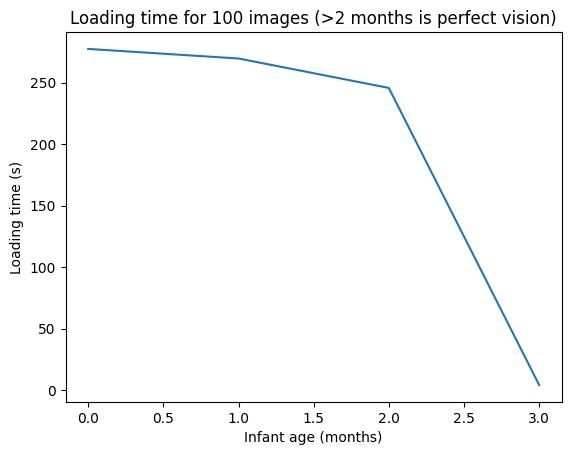

In [3]:
"""Script to test the loading time of the dataloader
for different infant ages vs adult vision"""

import torch as t
from data import CustomDataset
from matplotlib import pyplot as plt
import time

train_dataset = CustomDataset(data_type="jpeg", mode="train")
batch_size = 100
print("Batch size:", batch_size)
loading_times = []
for infant_age in range(4):
    train_dataset.infant_age = infant_age
    if infant_age < 3:
        print(
            f"\n\nVision for {train_dataset.infant_age} month old infant:",
        )
    else:
        print("\n\nAdult Vision:")

    train_dl = t.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        drop_last=True,
        shuffle=True,
        num_workers=1,
    )

    loading_start_time = time.time()
    (x, y) = next(iter(train_dl))
    current_time = time.time()
    print("Shape of x:", x.shape)
    print("Shape of y:", len(y))
    loading_time = (current_time - loading_start_time)
    loading_times.append(loading_time)

    if infant_age < 3:
        print(
            f"Loading time for {batch_size} images of {train_dataset.infant_age} months old infant vision:",
            loading_time,
        )
    else:
        print(f"Loading time for {batch_size} images of adult vision:", loading_time)

plt.figure()
plt.plot(loading_times)
plt.title("Loading time for 100 images (>2 months is perfect vision)")
plt.xlabel("Infant age (months)")
plt.ylabel("Loading time (s)")
plt.savefig("Loading_times.png")
